# Table of Contents
1. Average coverage plots
> 1.1 Experimental data    
> 1.2 Predictions    

2. BigWig coverage plots
> 2.1 Plot coverage of multiple models    
> 2.2 Plot coverage without axes    
> 2.3 Plot smoothed coverage without axes    
3. H5 coverage plots
    
## 1. Average coverage plots
The average coverage +/- 3 kbp around the TSS of the experimental data for all species in the dataset was plotted. The predictions for the test species were plotted as well.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def plot_tss_region_coverage(path, species, dset, ylim, ylabel, fsize=27, figsize=(9.,8.),
                             dpi=100, cmap="turbo_r", bl=False, ylabel_pad=12):
    colormap = mpl.colormaps.get_cmap(cmap)
    colors = colormap(np.linspace(0,1,len(species)))
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    suffix = "_bl" if bl else ""
    for i,spec in enumerate(species):
        cov = np.load(f"{path}/{spec}_{dset}_tss_coverage{suffix}.npy")
        if i == 0:
            x_len = cov.shape[0]
        ax.plot(cov, label=spec, c=colors[i], alpha=1.00, lw=2.2)
        ax.fill_between(x=np.arange(x_len), y1=cov,y2=0, color=colors[i], alpha=.4)
    
    # ticklabels
    ax.set_xticks([x * x_len for x in [0., 0.5, 1.]])
    ax.set_xticklabels(["-3kbp", "TSS", "+3kbp"], size=fsize, fontname="Times New Roman")
    ax.tick_params(axis="x", pad=12)
    ax.tick_params(axis='y', labelsize=fsize-1)
    for i, label in enumerate(ax.get_xticklabels()):
        if i==0:
            label.set_horizontalalignment('left') # right most x tick label
        elif i==2:
            label.set_horizontalalignment('right')

    for l in ax.get_yticklabels():
        l.set_family("Times New Roman")
    ax.set_xlim([0, x_len])
    ax.set_ylim([0, ylim])
    ax.set_ylabel(ylabel, size=fsize, fontname="Times New Roman", labelpad=ylabel_pad)
    #ax.legend(fontsize=13, fontname="Times New Roman")
    plt.legend(prop={'family':"Times New Roman", 'size':fsize-2},  labelspacing=0.07)
    plt.show()

In [3]:
def plot_predicted_tss_region_coverage(path, species, dset, models, labels, ylim, ylabel, fsize=27, figsize=(9.,8.),
                             dpi=100, cmap="turbo_r", bl=False, ylabel_pad=12):
    colormap = mpl.colormaps.get_cmap(cmap)
    colors = colormap(np.linspace(0,1,len(models)))
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    suffix = "_bl" if bl else ""
    for i,model in enumerate(models):
        cov = np.load(f"{path}/{species}_{dset}_{model}_tss_coverage{suffix}.npy")
        if i == 0:
            x_len = cov.shape[0]
        ax.plot(cov, label=labels[i], c=colors[i], alpha=1.00, lw=2.2)
        ax.fill_between(x=np.arange(x_len), y1=cov,y2=0, color=colors[i], alpha=.4)
    
    # ticklabels
    ax.set_xticks([x * x_len for x in [0., 0.5, 1.]])
    ax.set_xticklabels(["-3kbp", "TSS", "+3kbp"], size=fsize, fontname="Times New Roman")
    ax.tick_params(axis="x", pad=12)
    ax.tick_params(axis='y', labelsize=fsize-1)
    for i, label in enumerate(ax.get_xticklabels()):
        if i==0:
            label.set_horizontalalignment('left') # right most x tick label
        elif i==2:
            label.set_horizontalalignment('right')

    for l in ax.get_yticklabels():
        l.set_family("Times New Roman")
    ax.set_xlim([0, x_len])
    ax.set_ylim([0, ylim])
    ax.set_ylabel(ylabel, size=fsize, fontname="Times New Roman", labelpad=ylabel_pad)
    #ax.legend(fontsize=13, fontname="Times New Roman")
    plt.legend(prop={'family':"Times New Roman", 'size':fsize-2},  labelspacing=0.07)
    plt.show()

### 1.1 Experimental data
### 1.1.1 Dicot plots

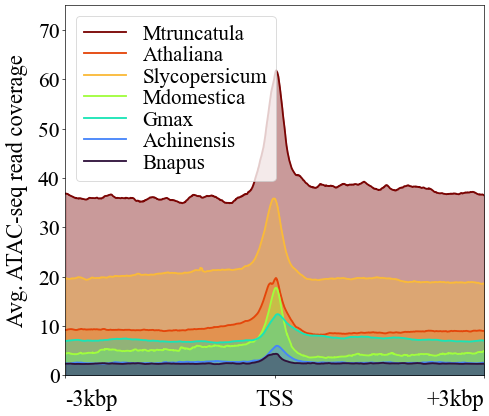

In [4]:
# ATAC-seq
plot_tss_region_coverage("../avg_tss_coverage",
                         ["Mtruncatula","Athaliana","Slycopersicum","Mdomestica","Gmax", "Achinensis", "Bnapus"],
                        "atacseq", 75, "Avg. ATAC-seq read coverage", dpi=60)

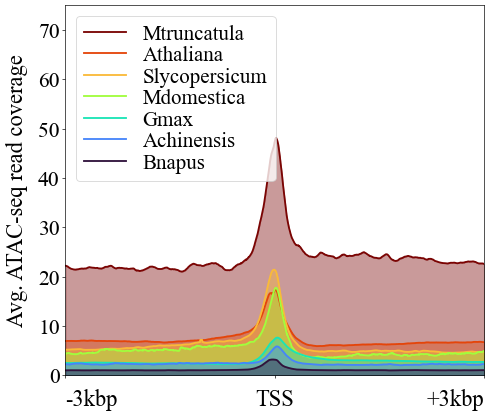

In [5]:
# ATAC-seq
plot_tss_region_coverage("../avg_tss_coverage",
                         ["Mtruncatula","Athaliana","Slycopersicum","Mdomestica","Gmax", "Achinensis", "Bnapus"],
                        "atacseq", 75, "Avg. ATAC-seq read coverage", dpi=60, bl=True)

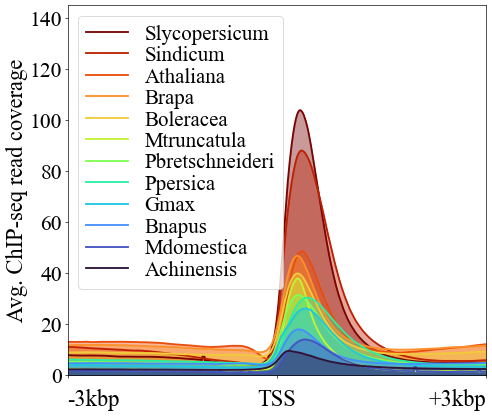

In [6]:
# ChIP-seq
dicots = ["Slycopersicum", "Sindicum", "Athaliana","Brapa","Boleracea","Mtruncatula",
          "Pbretschneideri","Ppersica","Gmax", "Bnapus", "Mdomestica","Achinensis"]
plot_tss_region_coverage("../avg_tss_coverage", dicots,
                        "h3k4me3", 145, "Avg. ChIP-seq read coverage", dpi=60, ylabel_pad=1.5)  # non-bl wasn't used

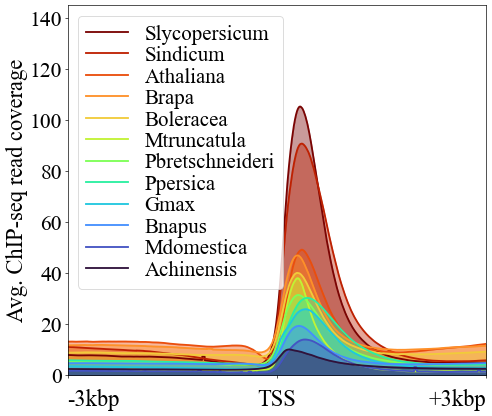

In [7]:
# ChIP-seq
dicots = ["Slycopersicum", "Sindicum", "Athaliana","Brapa","Boleracea","Mtruncatula",
          "Pbretschneideri","Ppersica","Gmax", "Bnapus", "Mdomestica","Achinensis"]
plot_tss_region_coverage("../avg_tss_coverage", dicots,
                        "h3k4me3", 145, "Avg. ChIP-seq read coverage", dpi=60, bl=True, ylabel_pad=1.5)

### 1.1.2 Monocot plots

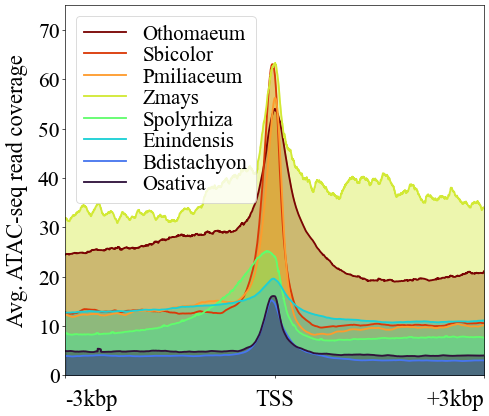

In [8]:
# ATAC-seq
plot_tss_region_coverage("../avg_tss_coverage",
                         ["Othomaeum", "Sbicolor","Pmiliaceum", "Zmays", "Spolyrhiza", "Enindensis",
                          "Bdistachyon", "Osativa"],
                        "atacseq", 75, "Avg. ATAC-seq read coverage", dpi=60)

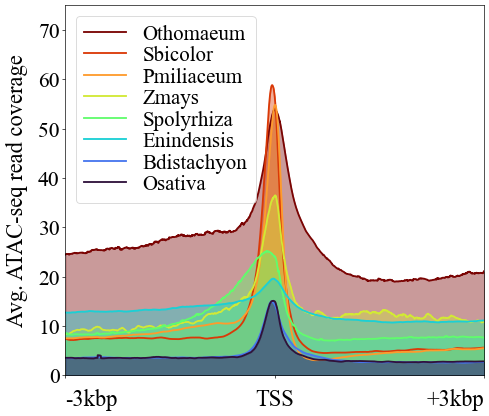

In [9]:
# ATAC-seq
plot_tss_region_coverage("../avg_tss_coverage",
                         ["Othomaeum", "Sbicolor","Pmiliaceum", "Zmays", "Spolyrhiza", "Enindensis",
                          "Bdistachyon", "Osativa"],
                        "atacseq", 75, "Avg. ATAC-seq read coverage", dpi=60, bl=True)

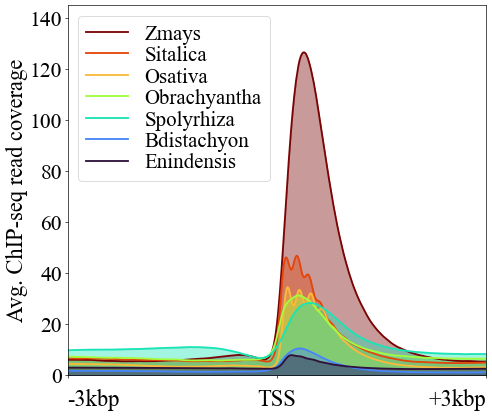

In [10]:
# ChIP-seq
monocots=["Zmays","Sitalica", "Osativa", "Obrachyantha","Spolyrhiza", "Bdistachyon", "Enindensis"]
plot_tss_region_coverage("../avg_tss_coverage", monocots,
                        "h3k4me3", 145, "Avg. ChIP-seq read coverage", dpi=60, ylabel_pad=1.5)  # non-bl wasn't used

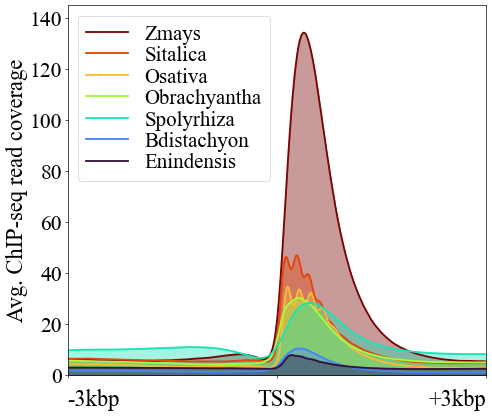

In [11]:
# ChIP-seq
monocots=["Zmays","Sitalica", "Osativa", "Obrachyantha","Spolyrhiza", "Bdistachyon", "Enindensis"]
plot_tss_region_coverage("../avg_tss_coverage", monocots,
                        "h3k4me3", 145, "Avg. ChIP-seq read coverage", dpi=60, bl=True, ylabel_pad=1.5)

### 1.1.3 Algae/moss plots

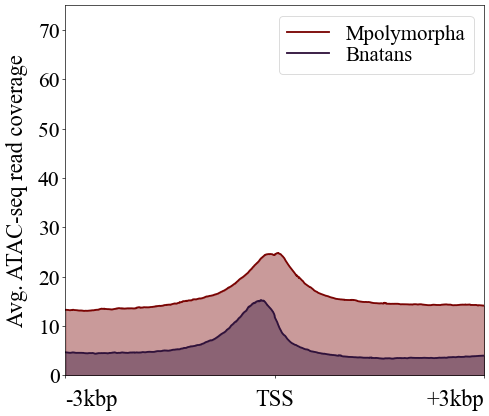

In [12]:
# ATAC-seq
plot_tss_region_coverage("../avg_tss_coverage",
                         ["Mpolymorpha", "Bnatans"],
                        "atacseq", 75, "Avg. ATAC-seq read coverage", dpi=60, bl=True) # same as non-bl

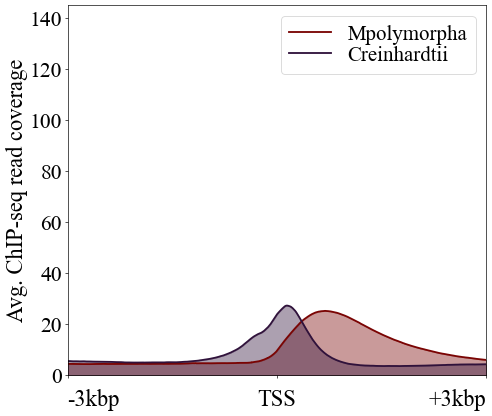

In [13]:
# ChIP-seq
plot_tss_region_coverage("../avg_tss_coverage", ["Mpolymorpha", "Creinhardtii"],
                        "h3k4me3", 145, "Avg. ChIP-seq read coverage", dpi=60, ylabel_pad=1.5)
# non-bl wasn't used

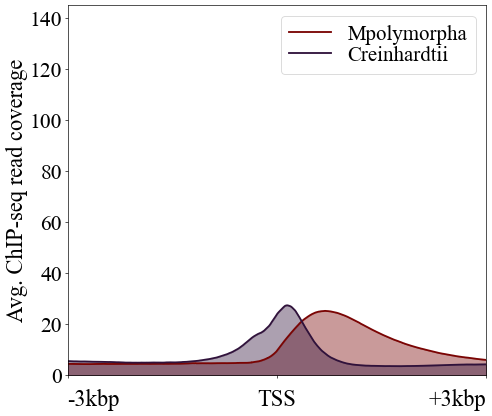

In [14]:
# ChIP-seq
plot_tss_region_coverage("../avg_tss_coverage", ["Mpolymorpha", "Creinhardtii"],
                        "h3k4me3", 145, "Avg. ChIP-seq read coverage", dpi=60, bl=True, ylabel_pad=1.5)

### 1.2 Predictions
#### 1.2.1 _A. thaliana_

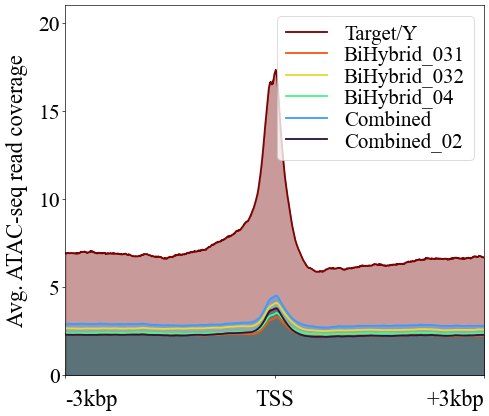

In [15]:
plot_predicted_tss_region_coverage("../paper/predictions", "Athaliana","atacseq",
                                   ["experimental","bihybrid_031", "bihybrid_032",
                                    "bihybrid_04", "combined", "combined_02"],
                                   ["Target/Y", "BiHybrid_031", "BiHybrid_032",
                                    "BiHybrid_04","Combined", "Combined_02"],
                                   21, "Avg. ATAC-seq read coverage", dpi=60, bl=True)

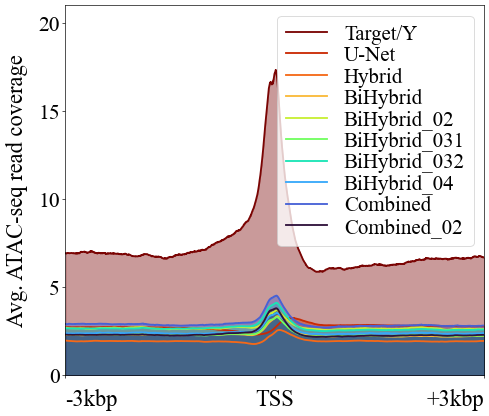

In [16]:
plot_predicted_tss_region_coverage("../paper/predictions", "Athaliana","atacseq",
                                   ["experimental","unet", "hybrid","bihybrid", "bihybrid_02", "bihybrid_031",
                                    "bihybrid_032", "bihybrid_04", "combined", "combined_02"],
                                   ["Target/Y","U-Net", "Hybrid", "BiHybrid", "BiHybrid_02", "BiHybrid_031", "BiHybrid_032",
                                    "BiHybrid_04","Combined", "Combined_02"],
                                   21, "Avg. ATAC-seq read coverage", dpi=60, bl=True)

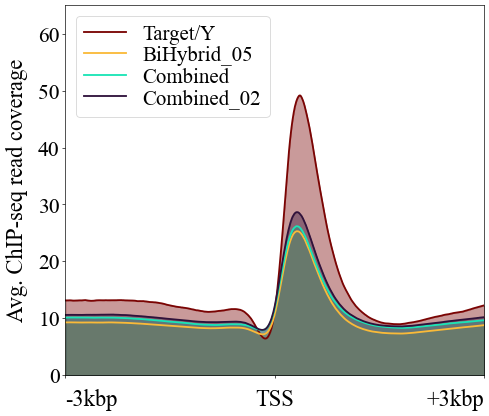

In [17]:
plot_predicted_tss_region_coverage("../paper/predictions", "Athaliana","h3k4me3",
                                   ["experimental","bihybrid_05", "combined", "combined_02"],
                                   ["Target/Y", "BiHybrid_05", "Combined", "Combined_02"],
                                   65, "Avg. ChIP-seq read coverage", dpi=60, bl=True)

#### 1.2.2 _O. sativa_

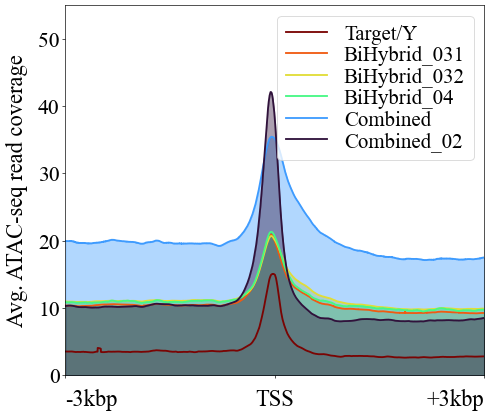

In [18]:
plot_predicted_tss_region_coverage("../paper/predictions", "Osativa","atacseq",
                                   ["experimental","bihybrid_031", "bihybrid_032",
                                    "bihybrid_04", "combined", "combined_02"],
                                   ["Target/Y", "BiHybrid_031", "BiHybrid_032",
                                    "BiHybrid_04","Combined", "Combined_02"],
                                   55, "Avg. ATAC-seq read coverage", dpi=60, bl=True)

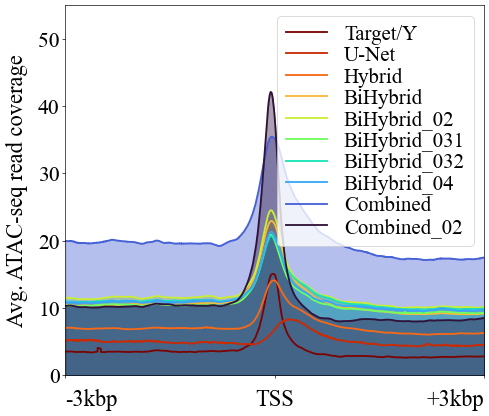

In [19]:
plot_predicted_tss_region_coverage("../paper/predictions", "Osativa","atacseq",
                                   ["experimental","unet", "hybrid","bihybrid", "bihybrid_02", "bihybrid_031", "bihybrid_032",
                                    "bihybrid_04", "combined", "combined_02"],
                                   ["Target/Y","U-Net", "Hybrid", "BiHybrid", "BiHybrid_02", "BiHybrid_031", "BiHybrid_032",
                                    "BiHybrid_04","Combined", "Combined_02"],
                                   55, "Avg. ATAC-seq read coverage", dpi=60, bl=True)

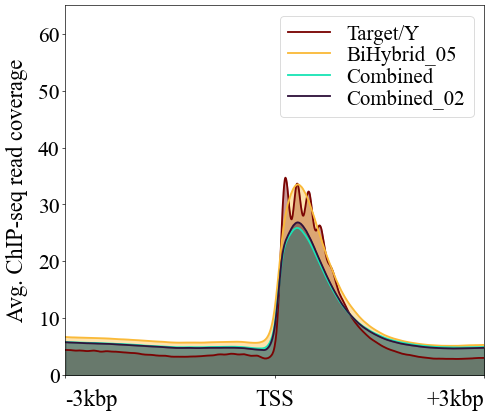

In [20]:
plot_predicted_tss_region_coverage("../paper/predictions", "Osativa","h3k4me3",
                                   ["experimental","bihybrid_05", "combined", "combined_02"],
                                   ["Target/Y", "BiHybrid_05", "Combined", "Combined_02"],
                                   65, "Avg. ChIP-seq read coverage", dpi=60, bl=True)

## 2. BigWig coverage plots
The average of the predictions for both strands per test species were used. The example regions are 80 kbp long. pyBigWig isn't available on Windows.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyBigWig

### 2.1 Plot coverage of multiple models

In [22]:
def plot_coverage(path, dirs, labels, species, dset, chrom, start, end, ylim, cmap="turbo_r",
                  fsize=17, figsize=(14, 1), dpi=100):
    rows = len(dirs)
    figsize = [figsize[0], rows*figsize[1]]
    fig, axs = plt.subplots(nrows=rows, ncols=1, figsize=figsize, dpi=dpi, sharex=True)
    
    colormap = mpl.colormaps[cmap]
    colors = colormap(np.linspace(0, 1, len(labels)))
    
    xlen = (end - start)
    # tick ranges
    divider = 10_000
    at = np.linspace(0, 1, (xlen//divider) + 1) * xlen
    xlabels = [int(x/(10**3)) for x in np.arange(start, (end + divider), divider)]
    #ylabels = np.arange(0, ylim, 50)
    #ay = np.linspace(0, 1, len(ylabels)) * ylim
    
    for i, dir_ in enumerate(dirs):
        bw = pyBigWig.open(f"{path}/{dir_}/{species}_{dset}_avg_strand.bw")
        bw_values = np.array(bw.values(chrom, start, end))
        axs[i].plot(bw_values, c=colors[i], alpha=1.)
        axs[i].fill_between(x=np.arange(xlen), y1=bw_values, y2=0, color=colors[i], alpha=1.)
        
        # setup axis
        axs[i].set_xlim([0, xlen])
        axs[i].set_ylim([0, ylim])
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        if (i + 1) == len(dirs):
            axs[i].set_xlabel(f"Average of both strands of {chrom} in kbp", size=fsize, fontname="Times New Roman")
            axs[i].set_xticks(at, labels=xlabels, fontname="Times New Roman")
            axs[i].tick_params(axis="x", labelsize=fsize-1)
    
        
        # ytick stuff
        axs[i].tick_params(axis='y', labelsize=fsize-1)
        #axs[i].set_yticks(ay, labels=ylabels, fontname="Times New Roman")
        for l in axs[i].get_yticklabels():
            l.set_family("Times New Roman")

        # axs[i].legend(prop={'family':"Times New Roman", 'size':fsize})
        
    plt.show()

In [23]:
def plot_legend(labels, cmap="turbo_r", fsize=17, dpi=100):
    # Create a color palette
    colormap = mpl.colormaps[cmap]
    colors = colormap(np.linspace(0, 1, len(labels)))
    palette = dict(zip(labels, colors))
    # Create legend handles manually
    handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
    # Create legend
    plt.legend(handles=handles, prop={'family':"Times New Roman", 'size':fsize})
    # Get current axes object and turn off axis
    plt.gca().set_axis_off()
    plt.gcf().set_dpi(dpi)
    plt.show()

#### ATAC-seq

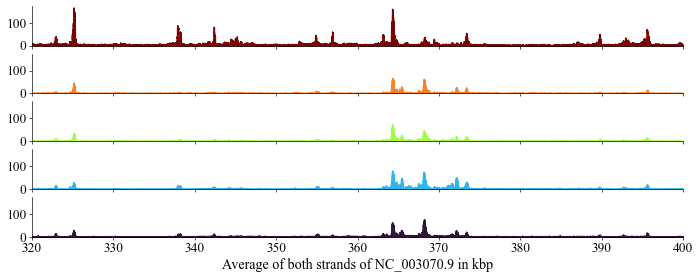

In [24]:
dirs = ["experimental", "bihybrid_031", "bihybrid_04", "combined", "combined_02"]
labels = ["Target/Y", "BiHybrid_03.1", "BiHybrid_04", "Combined", "Combined_02"]
plot_coverage("../paper/predictions", dirs, labels, "Athaliana", "atacseq", "NC_003070.9", 320_000, 400_000, 175, dpi=60)

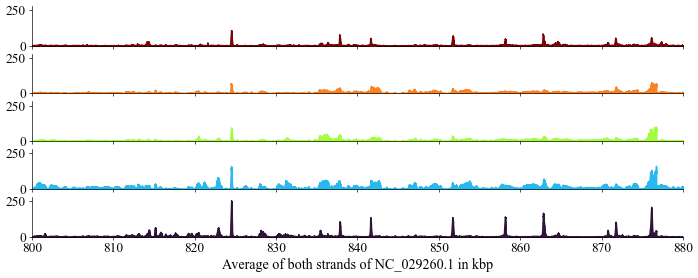

In [25]:
dirs = ["experimental", "bihybrid_031", "bihybrid_04", "combined", "combined_02"]
labels = ["Target/Y", "BiHybrid_03.1", "BiHybrid_04", "Combined", "Combined_02"]
plot_coverage("../paper/predictions", dirs, labels, "Osativa", "atacseq", "NC_029260.1", 800_000, 880_000, 280, dpi=60)

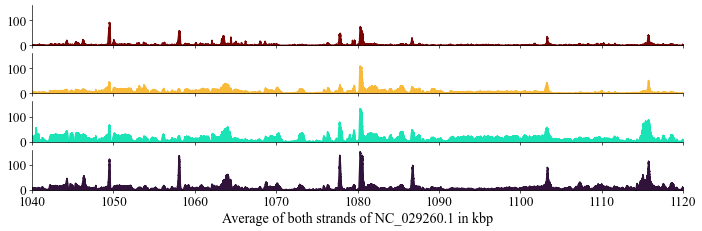

In [26]:
dirs = ["experimental", "bihybrid_04", "combined", "combined_02"]
labels = ["Target/Y", "BiHybrid_04", "Combined", "Combined_02"]
plot_coverage("../paper/predictions", dirs, labels, "Osativa", "atacseq", "NC_029260.1", 1_040_000, 1_120_000, 160, dpi=60)

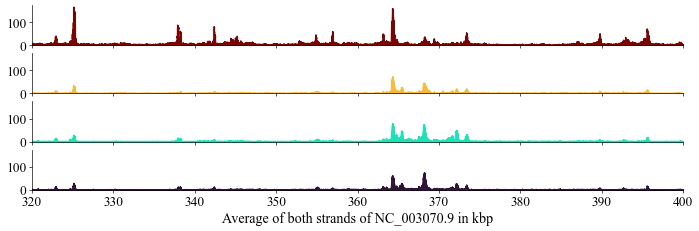

In [27]:
dirs = ["experimental", "bihybrid_04", "combined", "combined_02"]
labels = ["Target/Y", "BiHybrid_04", "Combined", "Combined_02"]
plot_coverage("../paper/predictions", dirs, labels, "Athaliana", "atacseq", "NC_003070.9", 320_000, 400_000, 175, dpi=60)

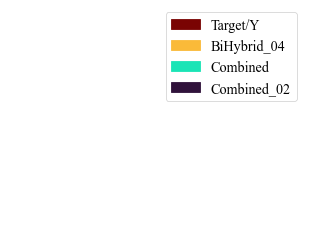

In [28]:
plot_legend(labels, dpi=60)

#### ChIP-seq

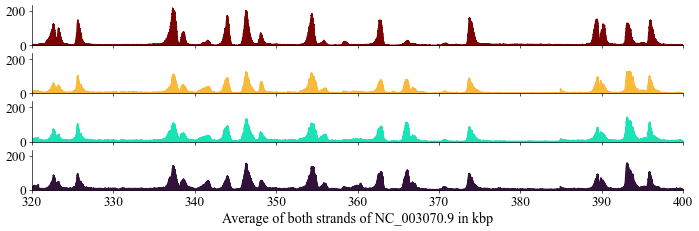

In [29]:
dirs = ["experimental", "bihybrid_05", "combined", "combined_02"]
labels = ["Target/Y", "BiHybrid_05", "Combined", "Combined_02"]
plot_coverage("../paper/predictions", dirs, labels, "Athaliana", "h3k4me3", "NC_003070.9", 320_000, 400_000, 235, dpi=60)

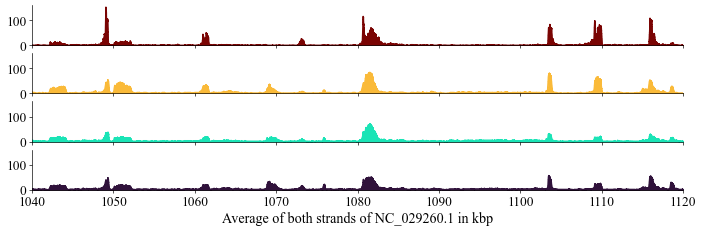

In [30]:
dirs = ["experimental", "bihybrid_05", "combined", "combined_02"]
labels = ["Target/Y", "BiHybrid_05", "Combined", "Combined_02"]
plot_coverage("../paper/predictions", dirs, labels, "Osativa", "h3k4me3", "NC_029260.1", 1_040_000, 1_120_000, 160, dpi=60)

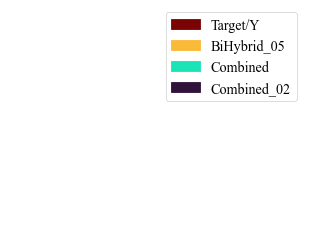

In [31]:
plot_legend(labels, dpi=60)

### 2.2 Plot coverage without axes

In [32]:
def plot_coverage(path, dirs, labels, species, dset, chrom, start, end, ylim, cmap="turbo_r",
                  fsize=17, figsize=(14, 1), dpi=100):
    rows = len(dirs)
    figsize = [figsize[0], rows*figsize[1]]
    fig, axs = plt.subplots(nrows=rows, ncols=1, figsize=figsize, dpi=dpi, sharex=True)
    
    colormap = mpl.colormaps[cmap]
    colors = colormap(np.linspace(0, 1, len(labels)))
    
    xlen = (end - start)
    # tick ranges
    divider = 10_000
    at = np.linspace(0, 1, (xlen//divider) + 1) * xlen
    xlabels = [int(x/(10**3)) for x in np.arange(start, (end + divider), divider)]
    
    for i, dir_ in enumerate(dirs):
        bw = pyBigWig.open(f"{path}/{dir_}/{species}_{dset}_avg_strand.bw")
        bw_values = np.array(bw.values(chrom, start, end))
        axs[i].plot(bw_values, c=colors[i], alpha=1.)
        axs[i].fill_between(x=np.arange(xlen), y1=bw_values, y2=0, color=colors[i], alpha=1.)
        
        # setup axis
        axs[i].set_xlim([0, xlen])
        axs[i].set_ylim([0, ylim])
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].get_xaxis().set_ticks([])
        axs[i].get_yaxis().set_ticks([])
        
    plt.show()

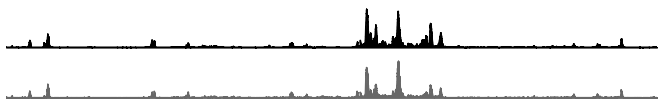

In [33]:
dirs = ["combined", "combined_02"]
labels = ["Combined", "Combined_02", "", ""]
plot_coverage("../paper/predictions", dirs, labels, "Athaliana", "atacseq", "NC_003070.9", 320_000, 400_000, 85,
              dpi=60, cmap="Greys_r")

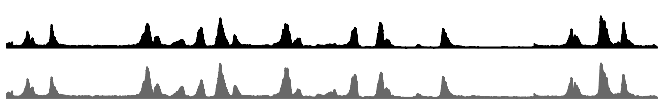

In [34]:
dirs = ["combined", "combined_02"]
labels = ["Combined", "Combined_02", "", ""]
plot_coverage("../paper/predictions", dirs, labels, "Athaliana", "h3k4me3", "NC_003070.9", 320_000, 400_000, 190,
              dpi=60, cmap="Greys_r")

### 2.3 Plot smoothed coverage without axes

In [35]:
def plot_coverage(path, dir_, labels, windows, species, dset, chrom, start, end, ylim, cmap="turbo_r",
                  fsize=17, figsize=(14, 1), dpi=100):
    rows = len(windows)
    figsize = [figsize[0], rows*figsize[1]]
    fig, axs = plt.subplots(nrows=rows, ncols=1, figsize=figsize, dpi=dpi, sharex=True)
    
    colormap = mpl.colormaps[cmap]
    colors = colormap(np.linspace(0, 1, len(labels)))
    
    xlen = (end - start)
    # tick ranges
    divider = 10_000
    at = np.linspace(0, 1, (xlen//divider) + 1) * xlen
    xlabels = [int(x/(10**3)) for x in np.arange(start, (end + divider), divider)]
    
    for i, ws in enumerate(windows):
        bw = pyBigWig.open(f"{path}/{dir_}/{species}_{dset}_avg_strand{ws}.bw")
        bw_values = np.array(bw.values(chrom, start, end))
        axs[i].plot(bw_values, c=colors[i], alpha=1.)
        axs[i].fill_between(x=np.arange(xlen), y1=bw_values, y2=0, color=colors[i], alpha=1.)
        
        # setup axis
        axs[i].set_xlim([0, xlen])
        axs[i].set_ylim([0, ylim])
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].get_xaxis().set_ticks([])
        axs[i].get_yaxis().set_ticks([])
        
    plt.show()

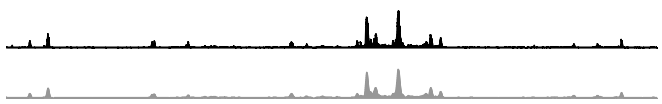

In [36]:
dir_ = "combined_02"
labels = ["Combined_02", "Combined_02 ws=250", ""]
plot_coverage("../paper/predictions", dir_, labels, ["", "_ws=250"],"Athaliana", "atacseq", "NC_003070.9", 320_000, 400_000, 85,
              dpi=60, cmap="Greys_r")

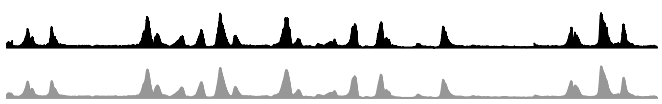

In [37]:
dir_ = "combined_02"
labels = ["Combined_02", "Combined_02 ws=250", ""]
plot_coverage("../paper/predictions", dir_, labels, ["", "_ws=250"],"Athaliana", "h3k4me3", "NC_003070.9", 320_000, 400_000, 190,
              dpi=60, cmap="Greys_r")

## 3. H5 coverage plots
Six example regions comparing Predmoter predictions (in blue) to experimental data (target/Y; in black) for the species *A. thaliana* and *O. sativa* in 5’ to 3’ direction are depicted. Three different prediction qualities are shown: "good", "medium" and "bad". The genome annotation was added to the non-prediction h5 files via [GeenuFF](https://github.com/weberlab-hhu/GeenuFF) and [Helixer](https://github.com/weberlab-hhu/Helixer).

In [38]:
import os
import numpy as np
import h5py
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [39]:
def plot_selected(i, f, pred, start, end, ylim, fsize=18, figsize=(14, 8.), as_int=True,
                  c_augline='gainsboro', dpi=100, show_legend=False):
    
    print(i)
    se = f['data/start_ends'][i]
    offset = f['data/start_ends'][i][0] + start
    chrom = f['data/seqids'][i]
    print(chrom, se)
    
    datasets = [dset.decode() for dset in pred["prediction/datasets"][:]]
    
    if "alternative" in f.keys():
        subplots = len(datasets) + 1  # reference annotation
        height_ratios = [1.2]*len(datasets) + [0.5]
        
    else:
        subplots = len(datasets)
        height_ratios = [1.2]*len(datasets)
        
    
    fig, axs = plt.subplots(subplots, 1, sharex=True, figsize=figsize,
                           gridspec_kw={"height_ratios": height_ratios}, dpi=dpi)
    
    for j, dset in enumerate(datasets):
        print(dset)
        axis_label = "ATAC-seq reads/bp" if dset == "atacseq" else "H3K4me3 reads/bp"
        legend=[]
        if f"{dset}_coverage" in f["evaluation"].keys():
            cov = np.mean(np.array(f[f'evaluation/{dset}_coverage'][i][start:end]), axis=1)
            axs[j].plot(cov, c="black")
            legend.append("target/Y")
            
        pred_cov = np.array(pred["prediction/predictions"][i][:,j][start:end])
        axs[j].plot(pred_cov, c="dodgerblue")
        legend.append("predictions")
        
        axs[j].set_xlim((0, end - start))
        axs[j].tick_params(axis='y', labelsize=fsize-1)
        axs[j].set_ylim(ylim[j])
        axs[j].set_ylabel(axis_label, size=fsize-1)
        if show_legend and j == 0:
            axs[j].legend(legend, fontsize=fsize)
    
    yticks = ['IG', 'UTR', 'CDS', 'Ntrn']
    if "alternative" in f.keys():
        j += 1
        axs[j].imshow(1 - np.array(f[f"alternative/reference/y"][i][start:end].T).astype(float),
                      aspect="auto", cmap='gray', interpolation='none')
        axs[j].set_ylim([-0.5, 3.5])
        axs[j].set_yticks([0,1,2, 3])
        axs[j].set_yticklabels(yticks, size=fsize-1)
        axs[j].set_ylabel("Ref.", size=fsize-1)
    

    at = [x * (end - start) for x in [0, .2, .4, .60, .8, 1]]
    axs[j].set_xticks(at)
    if se[1] - se[0] > 0:
        sign = '+'
        xticklabs = [(offset + x)/ 10**3 for x in at]
    else:
        sign = '-'
        xticklabs = [(offset - x)/ 10**3 for x in at]
    if as_int:
        xticklabs = [int(x) for x in xticklabs]
    else:
        xticklabs = [round(x, 2) for x in xticklabs]
    axs[j].set_xticklabels(xticklabs, size=fsize-1)
    axs[j].set_xlabel('position on ({}) strand of {} in kbp'.format(sign, chrom.decode()), size=fsize)
    
    plt.subplots_adjust(hspace=0.06)
    plt.show()

#### _Arabidopsis thaliana_: "good", "medium", and "bad" examples

In [40]:
f = h5py.File("../paper/h5_files/Athaliana.h5", "r")
g = h5py.File("../paper/h5_files/Athaliana_predictions.h5", "r")

5980
b'NC_003074.8' [19373904 19352520]
atacseq
h3k4me3


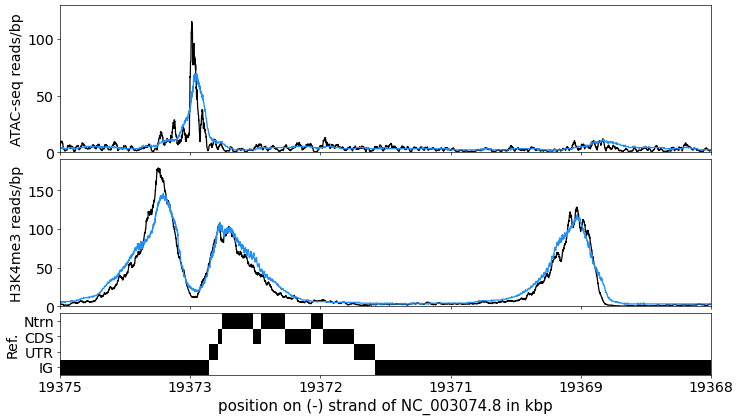

In [41]:
plot_selected(5980, f, g, ylim=[[0, 130], [0, 190]], start=1300, end=8000, dpi=60)

3735
b'NC_003071.7' [19010376 19031760]
atacseq
h3k4me3


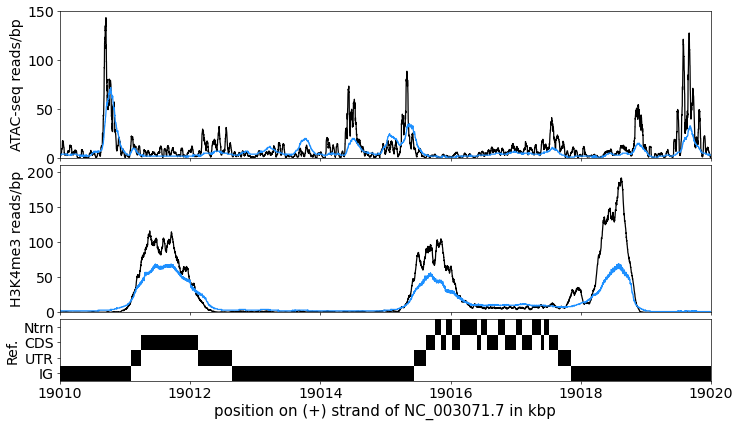

In [42]:
plot_selected(3735, f, g, ylim=[[0, 150], [0, 210]], start=0, end=10000, dpi=60)

13
b'NC_003070.9' [277992 299376]
atacseq
h3k4me3


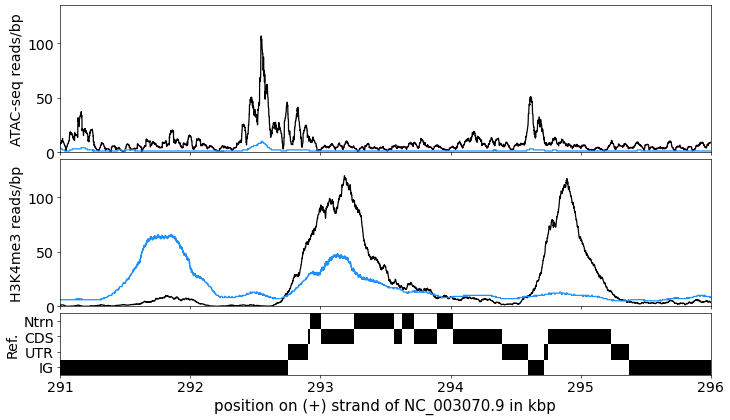

In [43]:
plot_selected(13, f, g, ylim=[[0, 135], [0, 135]], start=13500, end=18500, dpi=60)

#### _Oryza sativa_: "good", "medium", and "bad" examples

In [44]:
f = h5py.File("../paper/h5_files/Osativa.h5", "r")
g = h5py.File("../paper/h5_files/Osativa_predictions.h5", "r")

5461
b'NC_029257.1' [30215592 30236976]
atacseq
h3k4me3


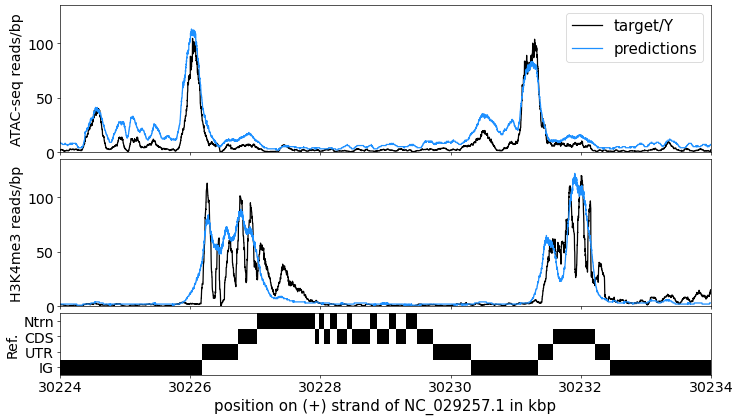

In [45]:
plot_selected(5461, f, g, ylim=[[0, 135], [0, 135]], start=8500, end=19000, dpi=60, show_legend=True)

5957
b'NC_029257.1' [31070952 31049568]
atacseq
h3k4me3


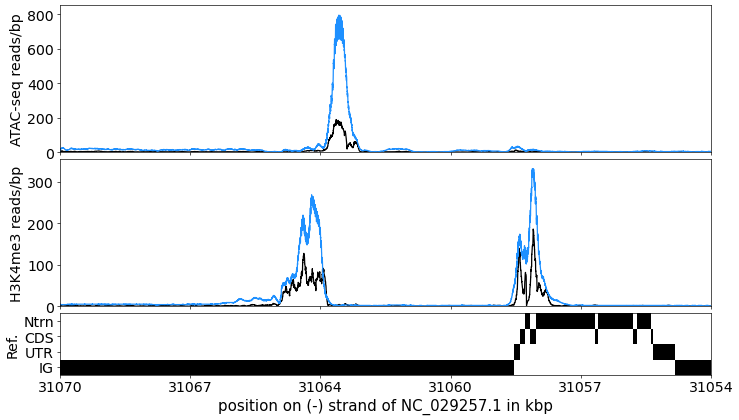

In [46]:
plot_selected(5957, f, g, ylim=[[0, 855], [0, 355]], start=0, end=16700, dpi=60)

1
b'NC_029256.1' [21384 42768]
atacseq
h3k4me3


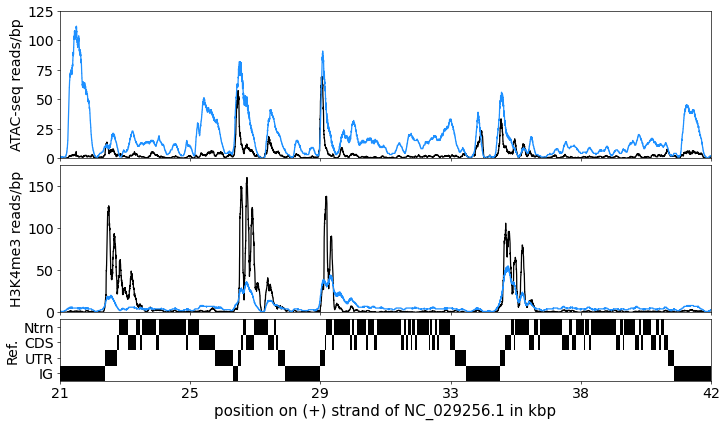

In [47]:
plot_selected(1, f, g, ylim=[[0, 125], [0, 175]], start=0, end=21000, dpi=60)